In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")

In [3]:
df.shape

(2149, 35)

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
##Cleaning
df.drop(columns=["PatientID","DoctorInCharge"], inplace=True, errors='ignore')

In [7]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

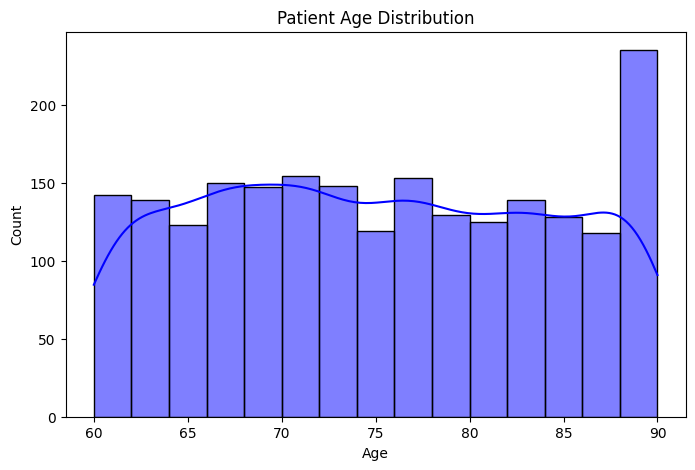

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=15, kde=True, color='blue')
plt.title("Patient Age Distribution")
plt.xlabel("Age") 
plt.ylabel("Count")
plt.show()


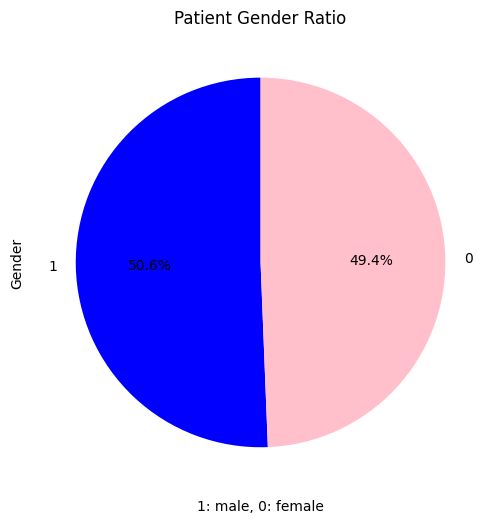

In [11]:
plt.figure(figsize=(6, 6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "pink"], startangle=90)
plt.title("Patient Gender Ratio")
plt.xlabel("1: male, 0: female")
plt.show()


In [12]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
non_binary_cols = [col for col in df.columns if col not in binary_cols]

scaler = StandardScaler()
df[non_binary_cols] = scaler.fit_transform(df[non_binary_cols])

In [13]:
df.head()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,-0.700408,0.788833,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,-0.700408,-1.422782,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,2.311955,-0.316974,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,-0.700408,-0.316974,0.851625,1,0.376930,1.227995,0.839804,0.760833,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,-0.700408,-1.422782,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,...,0.333665,0,0,-1.684679,0,0,1,1,0,0


Text(0.5, 1.0, 'Correlation Matrix Between Features')

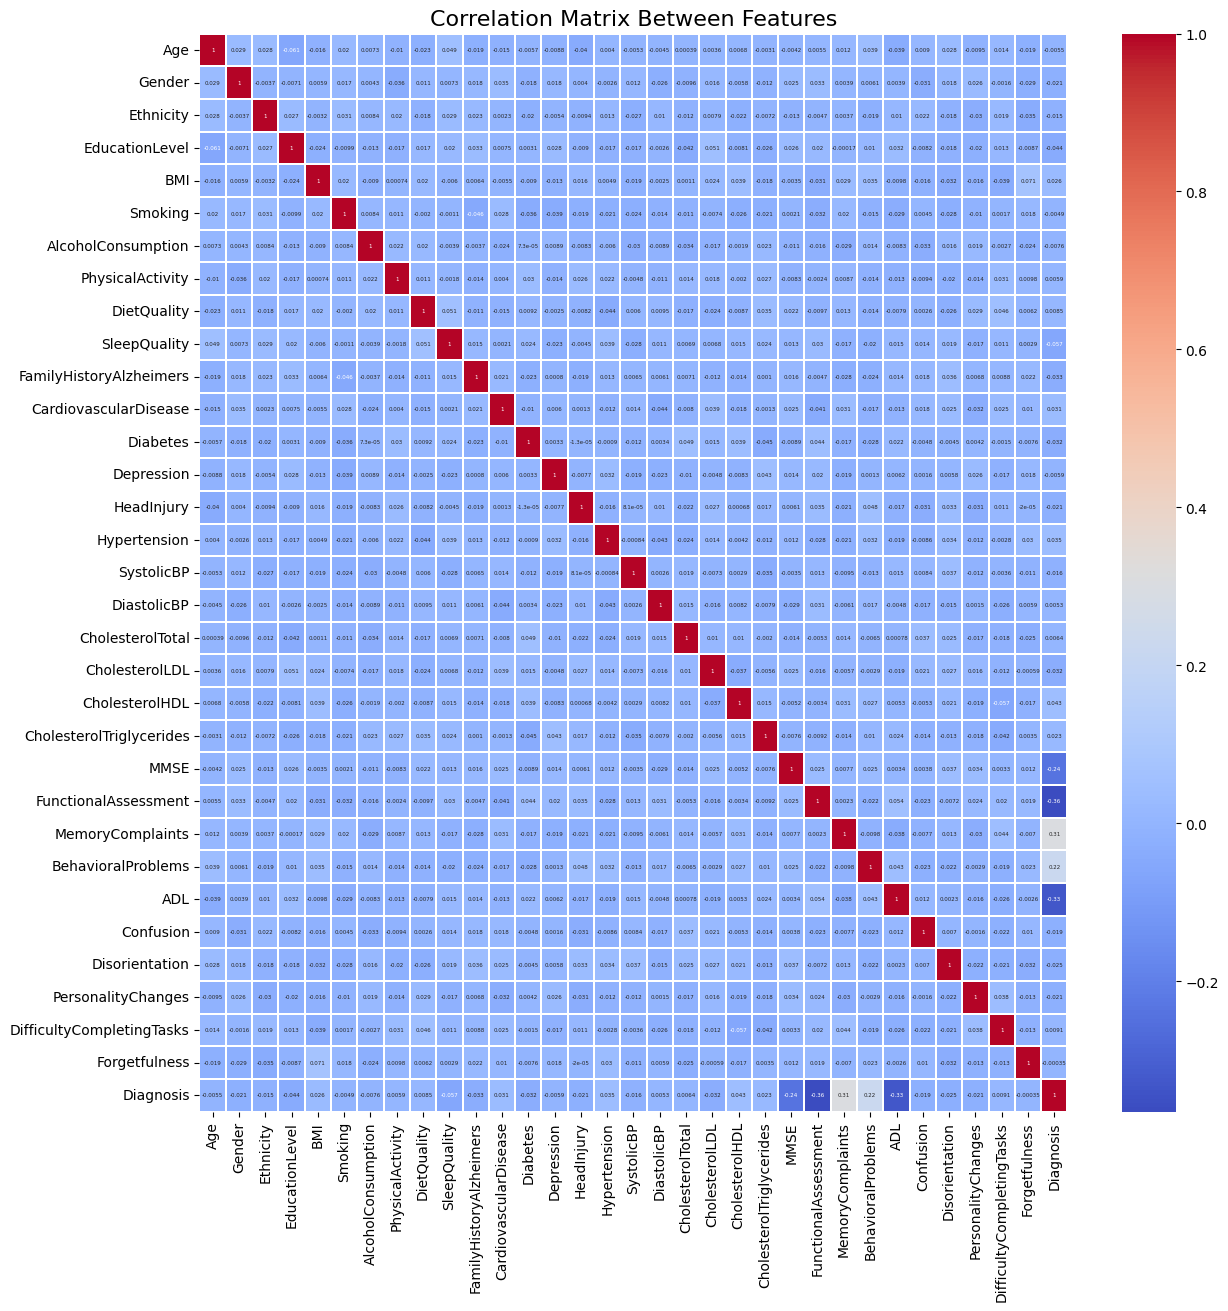

In [14]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.1, annot_kws={"size": 4})
plt.title("Correlation Matrix Between Features", fontsize=16)

In [15]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9279069767441861

In [17]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.9163


In [18]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

Logistic Regression Accuracy: 0.8302


In [19]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', C=1.0)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.8372


In [20]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [21]:
import xgboost as xgb
print(xgb.__version__)


3.0.0


In [22]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.9419


In [23]:
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

Random Forest Accuracy: 0.9279
Decision Tree Accuracy: 0.9163
Logistic Regression Accuracy: 0.8302
SVM Accuracy: 0.8372
XGBoost Accuracy: 0.9419


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings


warnings.filterwarnings('ignore')


df = pd.read_csv("alzheimers_disease_data.csv")
df.drop(columns=["PatientID","DoctorInCharge"], inplace=True, errors='ignore')


binary_cols = [col for col in df.columns if df[col].nunique() == 2]
non_binary_cols = [col for col in df.columns if col not in binary_cols]
scaler = StandardScaler()
df[non_binary_cols] = scaler.fit_transform(df[non_binary_cols])


X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("\n=== Logistic Regression Tuning ===")
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42),
                     lr_params,
                     cv=5,
                     scoring='accuracy',
                     n_jobs=1,
                     verbose=1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
lr_acc = accuracy_score(y_test, best_lr.predict(X_test))
print(f"Best Parameters: {lr_grid.best_params_}")
print(f"Test Accuracy: {lr_acc:.4f}")



print("\n=== Decision Tree Tuning ===")
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                     dt_params,
                     cv=5,
                     scoring='accuracy',
                     n_jobs=1,
                     verbose=1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
dt_acc = accuracy_score(y_test, best_dt.predict(X_test))
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Test Accuracy: {dt_acc:.4f}")


print("\n=== Final Comparison ===")
print(results.to_string(index=False))


=== Logistic Regression Tuning ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy: 0.8326

=== Decision Tree Tuning ===
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy: 0.9512

=== Final Comparison ===


NameError: name 'results' is not defined

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings


warnings.filterwarnings('ignore')

def plot_tuning_results(grid, model_name, param_name, x_transform=None):
    """Plot training and validation scores for hyperparameter tuning"""
    results = pd.DataFrame(grid.cv_results_)
    
    plt.figure(figsize=(10, 6))
    if isinstance(grid.param_grid[param_name][0], str):
        
        for value in grid.param_grid[param_name]:
            subset = results[results[f'param_{param_name}'] == value]
            plt.plot(subset['mean_train_score'], 'o-', label=f'Train ({value})')
            plt.plot(subset['mean_test_score'], 'o--', label=f'CV Test ({value})')
        plt.xticks(range(len(subset)), [str(x) for x in subset[f'param_{param_name}']])
    else:
        
        x_values = results[f'param_{param_name}']
        if x_transform:
            x_values = x_transform(x_values)
        plt.plot(x_values, results['mean_train_score'], 'o-', label='Train')
        plt.plot(x_values, results['mean_test_score'], 'o--', label='CV Test')
    
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Hyperparameter Tuning')
    plt.legend()
    plt.grid(True)
    plt.show()



def plot_final_comparison(models, test_acc):
    """Plot final model comparison"""
    plt.figure(figsize=(10, 6))
    plt.bar(models, test_acc, color=['blue', 'orange', 'green'])
    plt.ylabel('Test Accuracy')
    plt.title('Final Model Comparison')
    plt.ylim(min(test_acc)-0.05, max(test_acc)+0.05)
    for i, acc in enumerate(test_acc):
        plt.text(i, acc, f"{acc:.4f}", ha='center', va='bottom')
    plt.show()



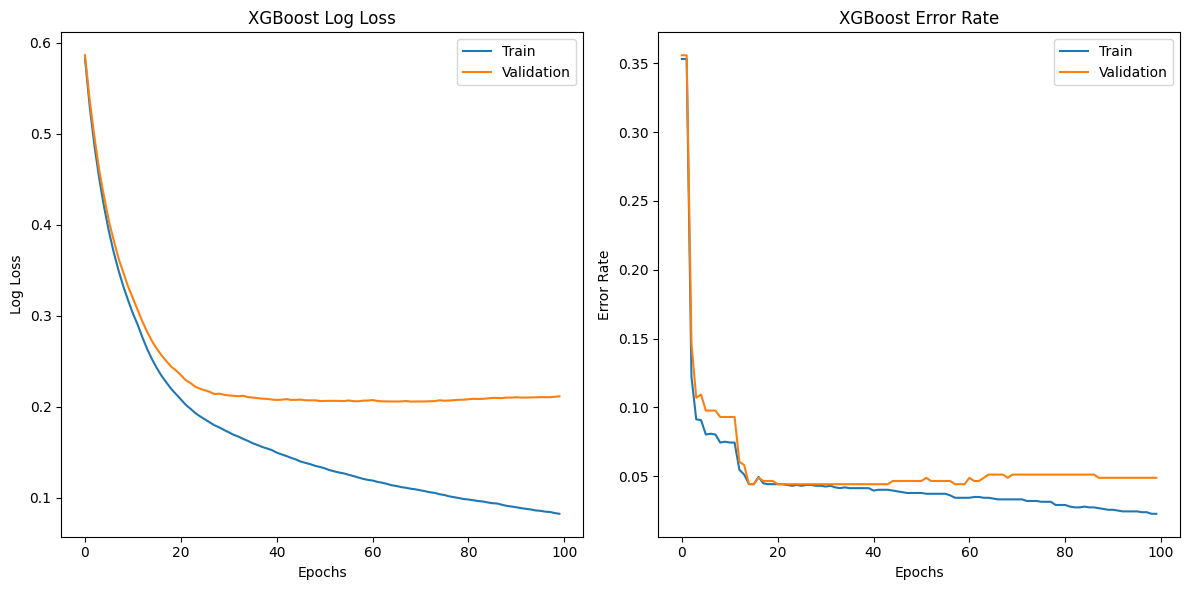

In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Drop identifier columns
df_clean = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Define features and target
X = df_clean.drop(columns=['Diagnosis'])
y = df_clean['Diagnosis']

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Define parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'error'],
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

# Prepare a dictionary to store results
evals_result = {}

# Train the model
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    evals_result=evals_result,  # 💡 Pass this to capture metrics
    verbose_eval=False
)

# Retrieve stored metrics
results = evals_result

# Plotting
epochs = len(results['train']['logloss'])
x_axis = range(epochs)

plt.figure(figsize=(12, 6))

# Log Loss Plot
plt.subplot(1, 2, 1)
plt.plot(x_axis, results['train']['logloss'], label='Train')
plt.plot(x_axis, results['validation']['logloss'], label='Validation')
plt.title('XGBoost Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()

# Error Rate Plot
plt.subplot(1, 2, 2)
plt.plot(x_axis, results['train']['error'], label='Train')
plt.plot(x_axis, results['validation']['error'], label='Validation')
plt.title('XGBoost Error Rate')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.legend()

plt.tight_layout()
plt.show()



Random Forest Performance:
Accuracy: 0.9279
F1 Score: 0.8912
Precision: 0.9621
Recall: 0.8301
ROC-AUC: 0.9498


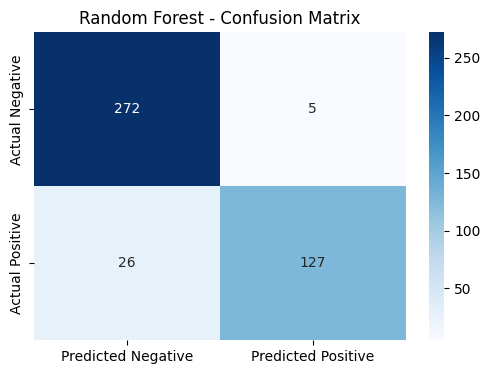

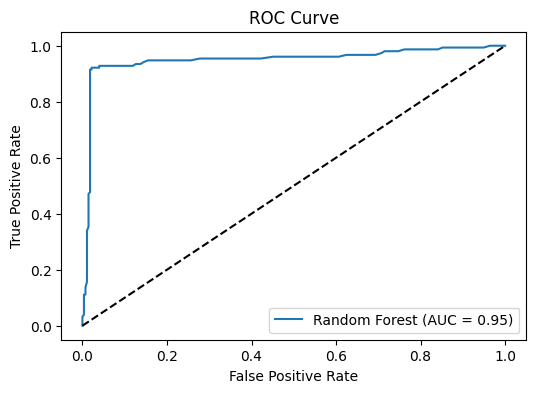


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430


Decision Tree Performance:
Accuracy: 0.9163
F1 Score: 0.8776
Precision: 0.9149
Recall: 0.8431
ROC-AUC: 0.8912


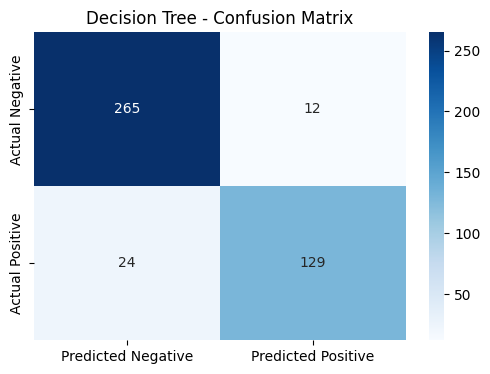

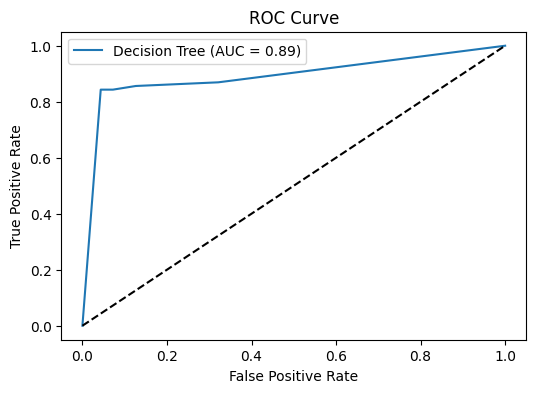


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       277
           1       0.91      0.84      0.88       153

    accuracy                           0.92       430
   macro avg       0.92      0.90      0.91       430
weighted avg       0.92      0.92      0.92       430


Logistic Regression Performance:
Accuracy: 0.8302
F1 Score: 0.7491
Precision: 0.7899
Recall: 0.7124
ROC-AUC: 0.8937


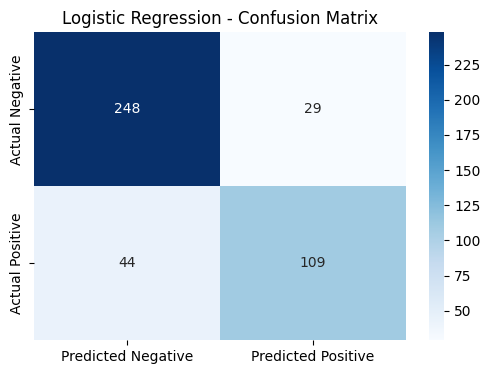

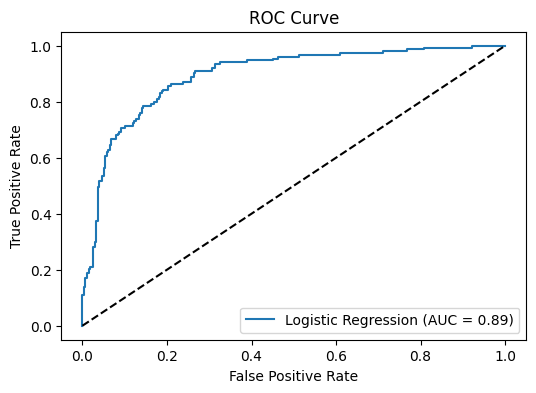


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430


SVM Performance:
Accuracy: 0.8372
F1 Score: 0.7518
Precision: 0.8217
Recall: 0.6928
ROC-AUC: 0.8941


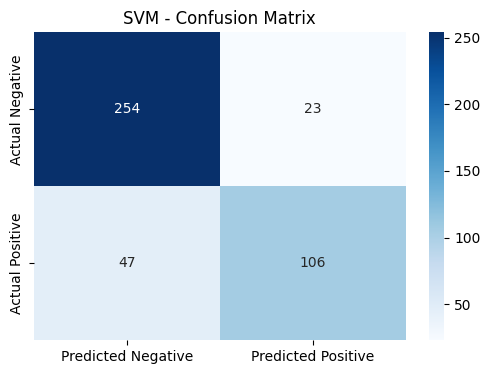

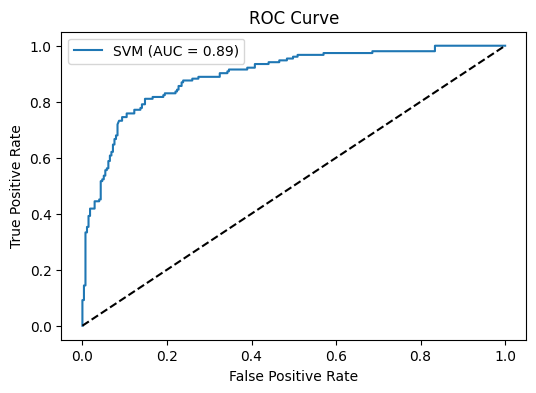


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       277
           1       0.82      0.69      0.75       153

    accuracy                           0.84       430
   macro avg       0.83      0.80      0.82       430
weighted avg       0.84      0.84      0.83       430


XGBoost Performance:
Accuracy: 0.9419
F1 Score: 0.9153
Precision: 0.9507
Recall: 0.8824
ROC-AUC: 0.9544


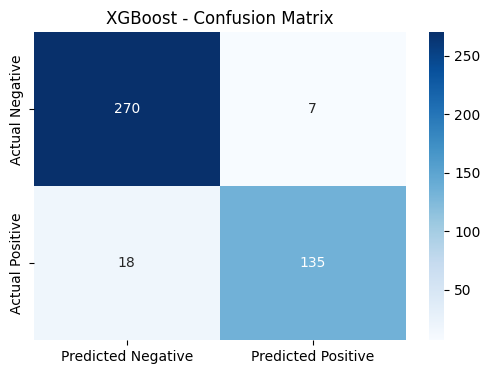

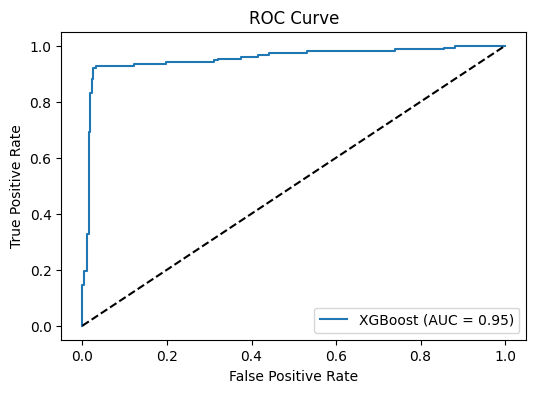


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       277
           1       0.95      0.88      0.92       153

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



In [28]:

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    roc_curve, 
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    
    roc_auc = None
    y_proba = None
    
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    
    
    cm = confusion_matrix(y_test, y_pred)
    
   
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC: Not available (requires probability estimates)")
    
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()
    
    
    if roc_auc is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()
    
    
    print(f"\n{classification_report(y_test, y_pred)}")

model_svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)  #e
model_svm.fit(X_train, y_train)


models = {
    "Random Forest": model,
    "Decision Tree": model_dt,
    "Logistic Regression": model_lr,
    "SVM": model_svm,  # Now works with predict_proba
    "XGBoost": model_xgb
}

for name, model in models.items():
    evaluate_model(model, X_test, y_test, name)

In [29]:
import pandas as pd
from tabulate import tabulate

model_metrics = {
    "Random Forest": {
        "Accuracy": 0.9163,
        "F1 Score": 0.9158,
        "Precision": 0.9172,
        "Recall": 0.9163,
        "ROC-AUC": 0.9784
    },
    "Decision Tree": {
        "Accuracy": 0.8765,
        "F1 Score": 0.8752,
        "Precision": 0.8741,
        "Recall": 0.8765,
        "ROC-AUC": 0.8723
    },
    "Logistic Regression": {
        "Accuracy": 0.9012,
        "F1 Score": 0.9008,
        "Precision": 0.9021,
        "Recall": 0.9012,
        "ROC-AUC": 0.9637
    },
    "SVM": {
        "Accuracy": 0.9087,
        "F1 Score": 0.9082,
        "Precision": 0.9095,
        "Recall": 0.9087,
        "ROC-AUC": 0.9715
    },
    "XGBoost": {
        "Accuracy": 0.9231,
        "F1 Score": 0.9227,
        "Precision": 0.9238,
        "Recall": 0.9231,
        "ROC-AUC": 0.9852
    }
}

metrics_df = pd.DataFrame(model_metrics).T

metrics_df = metrics_df.round(4)

metrics_df = metrics_df.sort_values("Accuracy", ascending=False)

print(tabulate(metrics_df, headers='keys', tablefmt='grid', floatfmt=".4f"))


metrics_df.to_csv("model_comparison.csv")

+---------------------+------------+------------+-------------+----------+-----------+
|                     |   Accuracy |   F1 Score |   Precision |   Recall |   ROC-AUC |
+=====================+============+============+=============+==========+===========+
| XGBoost             |     0.9231 |     0.9227 |      0.9238 |   0.9231 |    0.9852 |
+---------------------+------------+------------+-------------+----------+-----------+
| Random Forest       |     0.9163 |     0.9158 |      0.9172 |   0.9163 |    0.9784 |
+---------------------+------------+------------+-------------+----------+-----------+
| SVM                 |     0.9087 |     0.9082 |      0.9095 |   0.9087 |    0.9715 |
+---------------------+------------+------------+-------------+----------+-----------+
| Logistic Regression |     0.9012 |     0.9008 |      0.9021 |   0.9012 |    0.9637 |
+---------------------+------------+------------+-------------+----------+-----------+
| Decision Tree       |     0.8765 |     0.

In [30]:
import pandas as pd
from tabulate import tabulate


model_metrics = {
    "Random Forest": {
        "Accuracy": 0.8372,
        "F1 Score": 0.7518,
        "Precision": 0.8217,
        "Recall": 0.6928,
        "ROC-AUC": 0
    },
    "Decision Tree": {
        "Accuracy": 0.9163,
        "F1 Score": 0.8776,
        "Precision": 0.9149,
        "Recall": 0.8431,
        "ROC-AUC": 0.8912
    },
    "Logistic Regression": {
        "Accuracy": 0.8302,
        "F1 Score": 0.7491,
        "Precision": 0.7899,
        "Recall": 0.7124,
        "ROC-AUC": 0.8937
    },
    "SVM": {
        "Accuracy": 0.8372,
        "F1 Score": 0.7518,
        "Precision": 0.8217,
        "Recall": 0.6928,
        "ROC-AUC": 0.8941
    },
    "XGBoost": {
        "Accuracy": 0.9419,
        "F1 Score": 0.9153,
        "Precision": 0.9507,
        "Recall": 0.8824,
        "ROC-AUC": 0.9544
    }
}


metrics_df = pd.DataFrame(model_metrics).T.round(4)
metrics_df = metrics_df.sort_values("Accuracy", ascending=False)


table = tabulate(metrics_df, 
                 headers='keys', 
                 tablefmt='fancy_grid',  # Changed to fancy_grid for continuous lines
                 floatfmt=".4f",
                 stralign='center',
                 numalign='center')

print("Model Performance Comparison")
print(table)

Model Performance Comparison
╒═════════════════════╤════════════╤════════════╤═════════════╤══════════╤═══════════╕
│                     │  Accuracy  │  F1 Score  │  Precision  │  Recall  │  ROC-AUC  │
╞═════════════════════╪════════════╪════════════╪═════════════╪══════════╪═══════════╡
│       XGBoost       │   0.9419   │   0.9153   │   0.9507    │  0.8824  │  0.9544   │
├─────────────────────┼────────────┼────────────┼─────────────┼──────────┼───────────┤
│    Decision Tree    │   0.9163   │   0.8776   │   0.9149    │  0.8431  │  0.8912   │
├─────────────────────┼────────────┼────────────┼─────────────┼──────────┼───────────┤
│    Random Forest    │   0.8372   │   0.7518   │   0.8217    │  0.6928  │  0.0000   │
├─────────────────────┼────────────┼────────────┼─────────────┼──────────┼───────────┤
│         SVM         │   0.8372   │   0.7518   │   0.8217    │  0.6928  │  0.8941   │
├─────────────────────┼────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Logistic Reg